# Experiment 2022-04-21

## Introduction

This is our first preliminary experiment with a TreeVibes device. The major objective was simply to get hardware and software running. 

## Methods

We attached a TreeVibes device to 2 foot long section of decaying coconut palm stem which was quite dry. 
The wood was soft enough to push a 6 inch TreeVibes probe into it by hand. 
Three third instar CRB grubs had been allowed to bore into the stem a fe days priorto the experiment. 
We were not sure if these were still alive. The experiment was done in an air conditioned lab at about 70 degess F. This is probably too cool for no

**Hardware.** The TreeVibes device, equipped with a 6 inch aluminum rod, was pushed into the stem. 
Power was provided by a wall plug adaptor. Audio output was cabled to a USB audio device attached to a laptop computer.

**Software.** We used Audacity to record and examine signals.

**Experimental steps.** 
We drilled a 1 inch diameter hole in the stem to a depth of 1 inchinto which we introduced CRB grubs.. 
We performed 3 experiments following these steps:
* a 1 minute timed recording of the TreeVibes signal was made to measure background
* a 1 minute timed recording was started when a grub was dropped into the 1 inch hole. 
A video of this step was recorded using a smart phone.

We replicated the experiment 3 times.
In rep 1, we used a 2nd instar grub. After recording, this grub was extracted from the hole and reused in rep 2.
In rep 3, we used a 3rd instar grub. The grub was not extracted from the hole at the end of the experiment. 
A second 1 minute recording was made after pausing for about 20 minutes.

## Analysis

Data were saved in the following files.

**2nd instar - trial 1**
* **../data/rec-2022-04-21/no_new_beetle.wav** background 1
* **../data/rec-2022-04-21/instar2_in-hole.wav** 2nd instar introduced - trial 1

**2nd instar - trial 2**
* **../data/rec-2022-04-21/no-new-beetle_2.wav** background 2
* **../data/rec-2022-04-21/instar_in_hole2.wav** 2nd instar introduced - trial 2

**3rd instar - trial 3**
* **../data/rec-2022-04-21/no-new-beetle3.wav** background 3
* **../data/rec-2022-04-21/i3-in-hole.wav** 3rd instar introduced 
* **../data/rec-2022-04-21/20m-after-intro-i3.wav** 20m after 3rd instar introduced

We used the mean absolute amplitude, MAA, as indicator of activity within each recording.
The following code returns a value of 420.
```python
from scipy.io import wavfile
import numpy as np

filename = '../data/rec-2022-04-21/i3-in-hole.wav'
samplerate, data = wavfile.read(filename)
maa = np.mean(np.abs(data))
print(int(maa))
```

In [9]:
from scipy.io import wavfile
from scipy.stats import mannwhitneyu
import numpy as np

from IPython.display import YouTubeVideo

In [10]:
def run_mann_whitney(background_wav, grub_wav):
    """
    Tests for significant digfference in activity between 2 wav files. 
    In this case we are looking at background vibrations detected by TreeVibes versus vibreations caused by movements of a CRB grub.   
    We use the mean absolute amplitude, MAA, as a measure of activity.
    
    Input:   
    filenames of 2 wav files, one containing background noise and the other containing signals causedby a grub.
    
    Output:
        background_maa: a measure of background noise
        grub_maa: a measure of background noise plus grub activity
        p_value: a measure of statistical significance between background_ma and grub_maa.
            This value is calculated by the Mann-Whitney test.
            A p_value of less than 0.05 indicates that the background_maa and grub_maa differ significantly.
    """
    _, background = wavfile.read(background_wav)
    _, grub = wavfile.read(grub_wav)
    background_maa = np.mean(np.abs(background))
    grub_maa = np.mean(np.abs(grub))
    _, p_value = mannwhitneyu(np.abs(background), np.abs(grub))
    return background_maa, grub_maa, p_value
          
# print(run_mann_whitney(t1_background, t1_grub))

In [11]:
t1_background = '../data/rec-2022-04-21/no_new_beetle.wav'
t1_grub =       '../data/rec-2022-04-21/instar2_in-hole.wav'

t2_background = '../data/rec-2022-04-21/no-new-beetle_2.wav'
t2_grub =       '../data/rec-2022-04-21/instar_in_hole2.wav'

t3_background = '../data/rec-2022-04-21/no-new-beetle3.wav'
t3_grub =       '../data/rec-2022-04-21/i3-in-hole.wav'
t3_grub_20m =   '../data/rec-2022-04-21/20m-after-intro-i3.wav'

In [12]:
#Trial 1 - grub I2

background_maa, grub_maa, p_value = run_mann_whitney(t1_background, t1_grub)
print(f'Trial 1 -grub I2:   {background_maa=:.4}   {grub_maa=:.4}   {p_value=:.4}')

<ipython-input-10-b4fe57f6ae47>:17: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, background = wavfile.read(background_wav)


Trial 1 -grub I2:   background_maa=229.0   grub_maa=289.8   p_value=0.0


In [13]:
# Trial 2 - CRB grub I2

background_maa, grub_maa, p_value = run_mann_whitney(t2_background, t2_grub)
print(f'Trial 2 - CRB:   grub I2{background_maa=:.4}   {grub_maa=:.4}   {p_value=:.4}')

Trial 2 - CRB:   grub I2background_maa=260.8   grub_maa=289.9   p_value=1.668e-123


In [14]:
# Trial 3 - CRB grub I3

background_maa, grub_maa, p_value = run_mann_whitney(t3_background, t3_grub)
print(f'Trial 3 - CRB grub I3:   {background_maa=:.4}   {grub_maa=:.4}   {p_value=:.4}')

Trial 3 - CRB grub I3:   background_maa=227.5   grub_maa=420.7   p_value=0.0


In [15]:
# 20 minutes after introduction
_, grub = wavfile.read(t3_grub_20m)
grub_maa = np.mean(np.abs(grub))
print(f'Activity of CRB grub I3 at 20 minutes after being placed in stem: {grub_maa=:.4}')

Activity of CRB grub I3 at 20 minutes after being placed in stem: grub_maa=228.9


In [16]:
%%html
<style>
table {float:left}
</style>

## Results and Discussion

In all three trials, there was a highly significance increase in signal activity following introduction of the grub. 

Note that background values are questionable because grubs were previously introduced into the log and these may have been active. 
Background MAA for trial 2 is 261, compared to 229 and 228 for trials 1 and 3.

At about 20 minutes after introduction of the 3rd instar grub in trial 3, activity was at backgroung levels (MAA = 230).

|trial|background MAA|grub MAA|p_value|
|-----|-------------:|-------:|------:|
|Trial 1 - 2nd instar|229|290|< 0.001|
|Trial 2 - 2nd instar|261|290|< 0.001|
|Trial 3 - 3nd instar|228|421|< 0.001|
|---- 20 minutes after introduction|-|230|-|    

Increased activity after introduction of grubs into the hole can clearly be seen in the following waveforms and spectrograms are screenshots from Audacity 3.1.3.

The spectrograms show that signal strength falls off dramatically above 5 kHz, suggesting that the sample rate for recordings can be reduced from 44,100 Hz to 10,000 Hz without loss of information.

### Trial 1 - CRB grub I2

Tracks000.png: Trial 1 background<br>
<img src="../images/Tracks000.png" width="800">

Tracks003.png: Trial 1 grub I2<br>
<img src="../images/Tracks003.png" width="800">

### Trial 2 - CRB grub I2

Tracks001.png: Trial 2 background<br>
<img src="../images/Tracks001.png" width="800">

Tracks007: Trial 2 grub<br>
<img src="../images/Tracks007.png" width="800">

### Trial 2 - CRB grub I2

Tracks002.png: Trial 3 background<br>
<img src="../images/Tracks002.png" width="800">

Tracks005: Trial 3 grub I3<br>
<img src="../images/Tracks005.png" width="800">

Tracks006: Trial 3 grub I3 20m after introduction<br>
<img src="../images/Tracks006.png" width="800">

### YouTube Videos

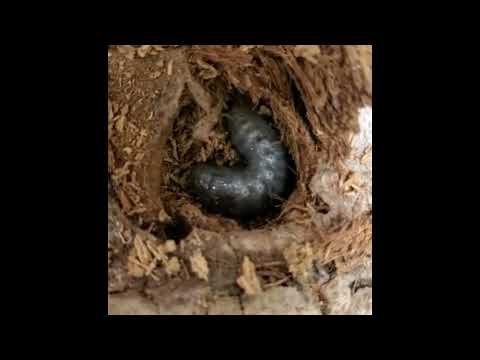

In [17]:
YouTubeVideo('NpxuaA8_dhQ')

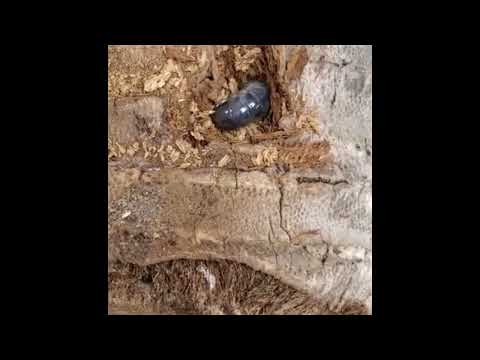

In [18]:
YouTubeVideo('XdpRKs2AyV4')

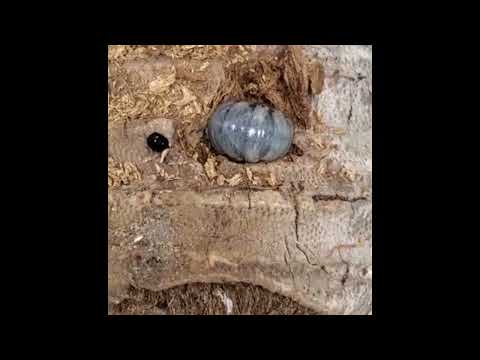

In [19]:
YouTubeVideo('Rt66_wWSqic')